In [2]:
import os
# Display current working directory
print(os.getcwd())
# To make sure opencv imports .exr files
os.environ["OPENCV_IO_ENABLE_OPENEXR"] = "1"
# If the current directory is not WDSS, then set it to one level up
if os.getcwd()[-4:] != 'WDSS':
    os.chdir('..')
print(os.getcwd())

c:\Dev\MinorProject\WDSS\jupyter_notebooks
c:\Dev\MinorProject\WDSS


In [3]:
import torch
import torch.nn as nn
import cv2
import zipfile
import numpy as np

import matplotlib.pyplot as plt

from utils.image_utils import ImageUtils
from network.dataset import *

In [4]:
dataset_path = r'D:\Dev\\MinorProjDataset\\V3\\DATA\\Compressed'
dataset = WDSSDatasetCompressed(dataset_path, 119)

# Open zip file
raw_frames = dataset._get_raw_frames(69, True)

torch.Size([1, 720, 1280])


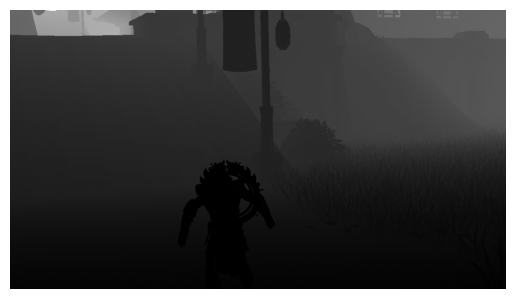

In [5]:
# ImageUtils.display_image(raw_frames[RawFrameGroup.HR])
# ImageUtils.display_image(raw_frames[RawFrameGroup.TEMPORAL])

print(raw_frames[RawFrameGroup.HR_GB][GB_Type.DEPTH].shape)
ImageUtils.display_image(raw_frames[RawFrameGroup.HR_GB][GB_Type.DEPTH], normalize=False)

In [6]:
frame = dataset[69]

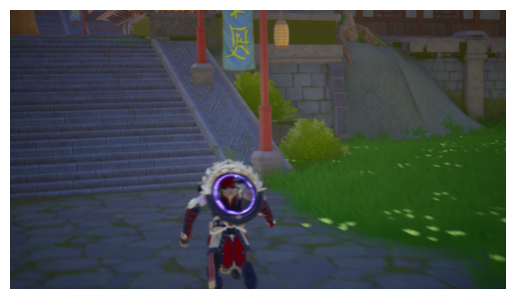

In [7]:
ImageUtils.display_image(frame['TEMPORAL'])

In [26]:
from utils.wavelet import WaveletProcessor
from network.losses import ImageEvaluator

wavelets = WaveletProcessor.batch_wt(frame['TEMPORAL'].unsqueeze(0))
resonstruct = WaveletProcessor.batch_iwt(wavelets)

# Print the max value in wavelet
print(resonstruct.max())  

tensor(1.0000)
